In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
# portfolio tickers


def get_ticker_data(ticker):
    local_fn = f"./{ticker.lower()}_hist.csv"
    if not os.path.isfile(local_fn):
        print('Reading from YF')
        t = yf.Ticker("ticker")
        data_hist = t.history(period='10y')
        data_hist.to_csv(local_fn)
        return data_hist
    else:
        print('Reading from local cache')
        data =  pd.read_csv(local_fn)
        return data.reset_index()


def get_div_ret(ticker):
        stock_hist = get_ticker_data(ticker)

        stock_hist.set_index('Date', inplace=True)
        stock_hist = stock_hist.sort_index(ascending=False)
        stock_hist_shifted = stock_hist.shift(1)

        stock_hist_m = stock_hist.merge(stock_hist_shifted, on=['Date'], suffixes=['', '_shifted'])

        # drop rows where div is 0.0. The assumption is that dividend date is the exdate
        shm = stock_hist_m[stock_hist_m.Dividends > 0]

        shm['min_ret'] = shm.apply(lambda row: row.Low_shifted - row.High + row.Dividends, axis=1)
        shm['open_close_ret'] = shm.apply(lambda row: row.Open_shifted - row.Close + row.Dividends, axis=1)

        shm.to_csv(f'./{ticker}_div_ret.csv')
        return shm

In [4]:
import matplotlib.pyplot as plt
div = get_div_ret('VZ')
div

Reading from local cache


,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,index_shifted,Open_shifted,High_shifted,Low_shifted,Close_shifted,Volume_shifted,Dividends_shifted,Stock Splits_shifted,min_ret,open_close_ret
Date,,,,,,,,,,,,,,,,,,
2023-10-06 00:00:00-04:00,2507,30.940001,31.000000,30.139999,30.850000,31277900,0.665,0.0,2508.0,30.740000,31.500000,30.740000,31.450001,20344300.0,0.0,0.0,0.405000,0.554999
2023-07-07 00:00:00-04:00,2443,35.463047,35.590327,35.120359,35.149734,20468100,0.653,0.0,2444.0,35.169315,35.208479,34.268543,34.405617,30326400.0,0.0,0.0,-0.668784,0.672580
2023-04-06 00:00:00-04:00,2381,37.994336,38.263661,37.667296,37.975098,21546600,0.653,0.0,2382.0,37.715389,37.850052,37.503777,37.850052,16114300.0,0.0,0.0,-0.106884,0.393291
2023-01-09 00:00:00-05:00,2320,39.154678,39.429080,39.088443,39.145214,23062200,0.653,0.0,2321.0,39.135748,39.722405,38.955964,39.694019,16695300.0,0.0,0.0,0.179884,0.643534
2022-10-06 00:00:00-04:00,2256,36.769345,36.946343,35.185663,35.250874,36663300,0.653,0.0,2257.0,35.055242,35.120452,34.291349,34.328609,31838700.0,0.0,0.0,-2.001994,0.457368
2022-07-07 00:00:00-04:00,2192,46.686355,46.777971,46.136675,46.457321,13617100,0.640,0.0,2193.0,46.283262,46.649715,46.182487,46.255779,13959200.0,0.0,0.0,0.044515,0.465941
2022-04-07 00:00:00-04:00,2131,47.454380,47.933898,47.083430,47.653423,22790600,0.640,0.0,2132.0,47.707712,48.567229,47.499619,48.431515,24852200.0,0.0,0.0,0.205720,0.694288
2022-01-07 00:00:00-05:00,2069,47.607528,48.590788,47.607528,48.483524,26512500,0.640,0.0,2070.0,48.706996,49.010912,48.099164,48.152794,24929400.0,0.0,0.0,0.148376,0.863472
2021-10-07 00:00:00-04:00,2005,47.729696,48.003495,47.544219,47.606045,18069600,0.640,0.0,2006.0,47.579545,47.667870,47.005448,47.023113,21384600.0,0.0,0.0,-0.358047,0.613500


<Axes: >

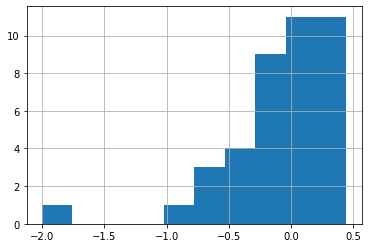

In [5]:
div.min_ret.hist()

<Axes: >

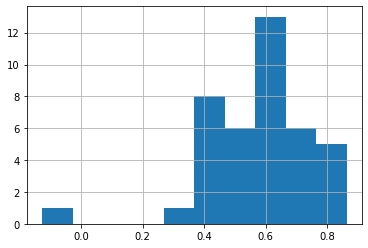

In [6]:
div.open_close_ret.hist()

In [8]:
div.min_ret.mean()

-0.06446672690701016

In [9]:
div.open_close_ret.mean()

0.5766562107427297

In [11]:
div.min_ret.sum()

-2.5786690762804065

In [12]:
div.open_close_ret.sum()

23.066248429709187

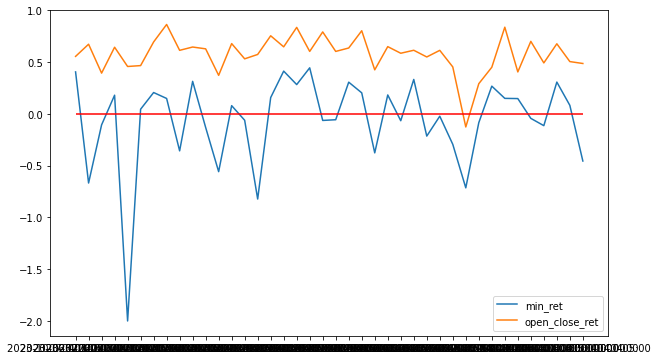

In [29]:
div1 = div.reset_index()

fig= plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(div1.Date, div1.min_ret, label="min_ret")
ax.plot(div1.Date, div1.open_close_ret, label="open_close_ret")
ax.hlines(y=0, xmin=div1.Date[0], xmax=div1.Date[div1.shape[0]-1], color='red')
plt.legend()
plt.show()